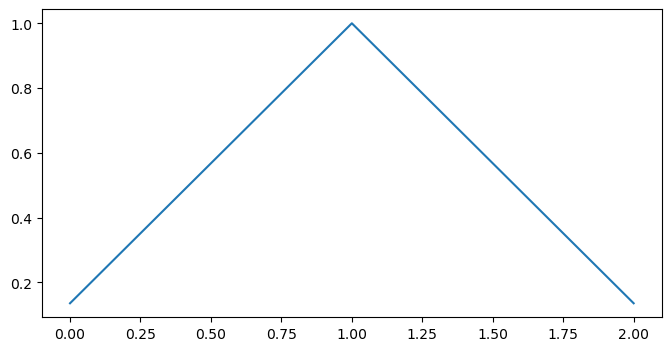

In [4]:
import numpy as np
from scipy.signal import windows
import matplotlib.pyplot as plt

width1 = 3
amp1 = 1

sigma1 = width1 / 6
gauss_1 = amp1 * windows.gaussian(width1, std=sigma1)

plt.figure(figsize=(8, 4))
plt.plot(gauss_1)
plt.show()

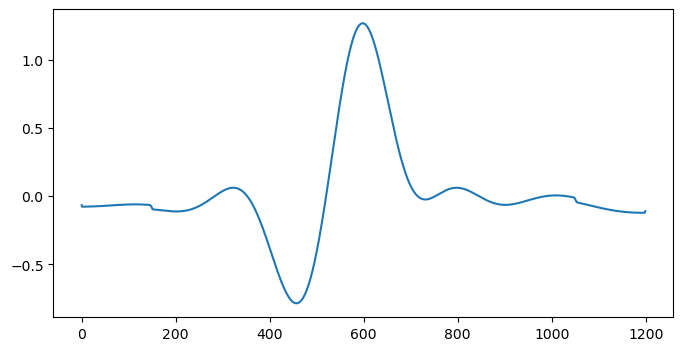

In [1]:
import numpy as np
from scipy.signal import windows
import matplotlib.pyplot as plt
from sharp_ss.model import Model, Prior
from sharp_ss.forward import create_G_from_model, convolve_P_G

tmp = np.loadtxt('ocean_stack.csv', delimiter=",", skiprows=1)
Ptime = tmp[:,0]
P = tmp[:,1]

dt = Ptime[1] - Ptime[0]

prior = Prior(tlen=Ptime[-1], stdP=0.1, dt=dt, widRange=(0.1, 5))
model = Model(Nphase=1, loc=np.array([15]), amp=np.array([0.1]), wid=np.array([1]), sig=0, nc1=0, nc2=0)

G = create_G_from_model(model=model, prior=prior)
D = convolve_P_G(P, G)

plt.figure(figsize=(8, 4))
plt.plot(D)
plt.show()

# Save
np.savez("./synthetic_0/synthetic_0.npz", P=P, D=D, G=G)

import pickle

# Save prior
with open("./synthetic_0/prior.pkl", "wb") as f:
    pickle.dump(prior, f)

# Save model
with open("./synthetic_0/model.pkl", "wb") as f:
    pickle.dump(model, f)



In [2]:
G.shape

(1197,)

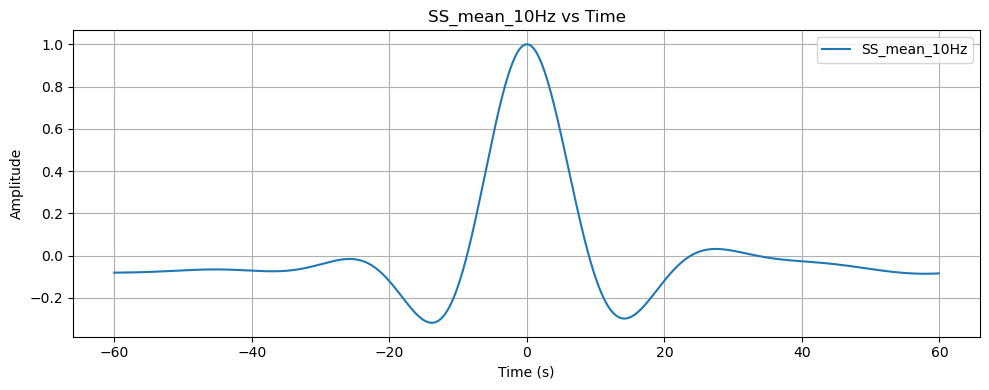

In [2]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the .mat file
mat = scipy.io.loadmat('/Users/evanzhang/evan.z.0920@gmail.com - Google Drive/My Drive/Research/SS_THBD/DataMats/OceanStack.mat')

# Extract and flatten the vectors
time_OS = mat['time_OS'].flatten()
SS_mean_10Hz = mat['SS_mean_10Hz'].flatten()

# Save to CSV
df = pd.DataFrame({
    'time': time_OS,
    'P': SS_mean_10Hz
})
df.to_csv('output.csv', index=False)

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(time_OS, SS_mean_10Hz, label='SS_mean_10Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('SS_mean_10Hz vs Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
